In [118]:
import librosa as lb
import matplotlib.pyplot as plt
import librosa.display
import soundfile as sf
from IPython.display import Audio
import numpy as np
from scipy.io.wavfile import write
from scipy.signal import stft,cosine,gaussian,convolve
import scipy.signal as sp

In [4]:
audio='AI-in-Speech-processing.wav'
signal,samprate=lb.load(audio,sr=None)

print("Original Signal:")
Audio(data=signal, rate=samprate)

Original Signal:


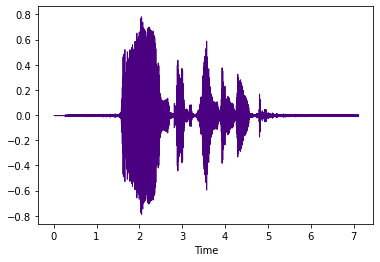

In [6]:
librosa.display.waveshow(signal,color='indigo')

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it. Use numpy.fft.ifft() to inverse transform the frequency spectrum to time domain signal.

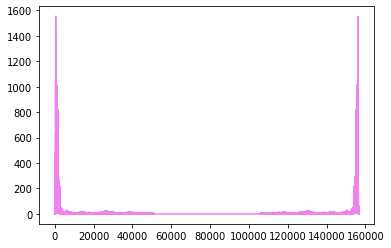

In [13]:
FT=np.fft.fft(signal)
plt.plot(np.abs(FT),color='violet')

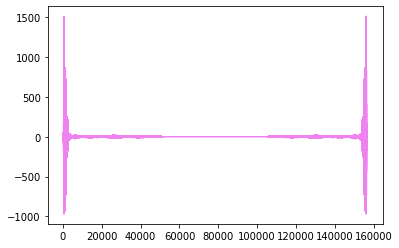

In [12]:
plt.plot(FT.real,color='violet')

In [14]:
IFT=np.fft.ifft(FT)
print(IFT)

[-8.70763157e-18-1.57669924e-18j -8.70763157e-18-1.09610714e-17j
  2.17690789e-17-2.56006352e-17j ...  1.25122070e-03+3.79275899e-19j
  1.34277344e-03-1.92740920e-18j  1.40380859e-03+2.67553571e-17j]


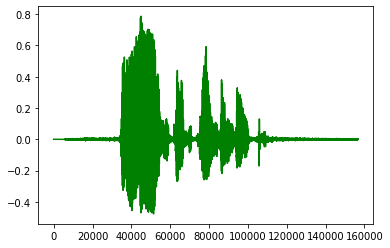

In [17]:
plt.plot(IFT.real,color='green')

A2. Use a rectangular window to select the low frequency components from your spectrum. Inverse transform the filtered spectrum and listen to this sound. Repeat the same for band pass and high pass frequencies of spectrum.

Low pass Filter

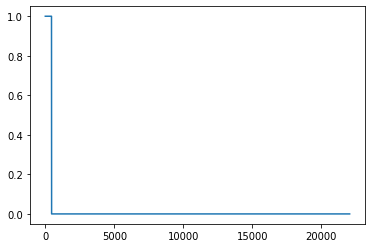

In [132]:
def rectangular_window(signal,cutoff_freq,fs):
    n = len(signal)
    freq = np.fft.rfftfreq(n,d=1/fs)  
    mask = np.abs(freq) <= cutoff_freq  
    plt.plot(freq,mask) 
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask, n)
    return filtered_signal

cutoff_freq = 450 
filtered_signal = rectangular_window(signal,cutoff_freq,samprate)

In [133]:
Audio(filtered_signal,rate=samprate)

In [134]:
sf.write('lowpass.wav',filtered_signal,samprate)

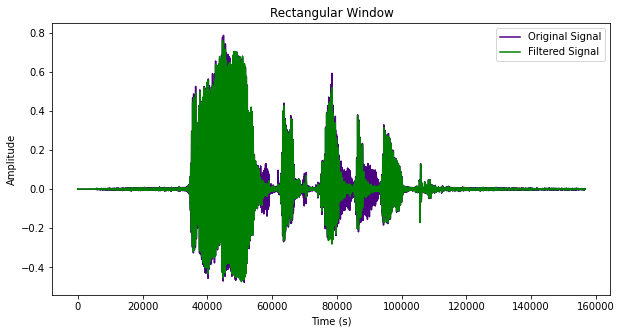

In [52]:
plt.figure(figsize=(10,5))
plt.plot(signal,label='Original Signal',color='indigo')
plt.plot(filtered_signal,label='Filtered Signal',color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window')
plt.legend()
plt.show()

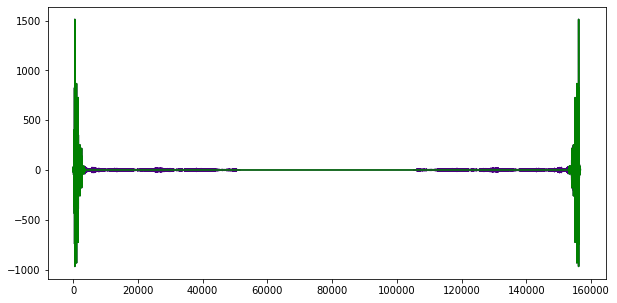

In [65]:
plt.figure(figsize=(10,5))
plt.plot(np.fft.fft(signal).real,label='Original Signal',color='indigo')
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal',color='green')

Bandpass Filter

(78337,)
[False False False ... False False False]


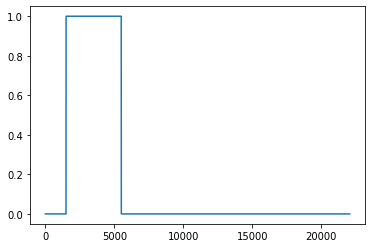

In [128]:
def rectangular_window(signal,lower_freq,higher_freq,fs):
    n = len(signal)
    freq = np.fft.rfftfreq(n,d=1/fs)  
    mask = (np.abs(freq) >= lower_freq) & (np.abs(freq) <= higher_freq) 
    plt.plot(freq,mask) 
    print(mask.shape)
    print(mask)
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask,n)  
    return filtered_signal

lower_freq = 1500
higher_freq = 5500
filtered_signal = rectangular_window(signal,lower_freq,higher_freq,samprate)

In [129]:
Audio(filtered_signal,rate=samprate)

In [131]:
sf.write('bandpass.wav',filtered_signal,samprate)

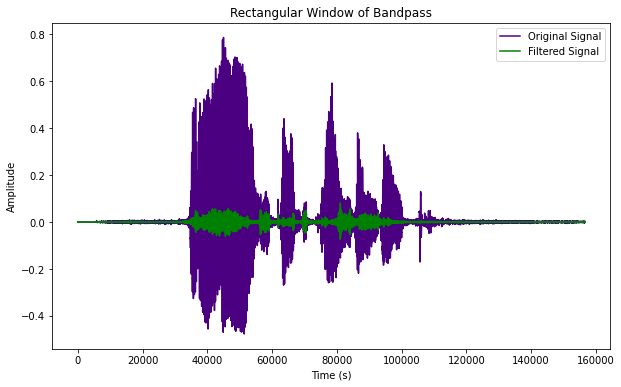

In [98]:
plt.figure(figsize=(10,6))
plt.plot(signal,label='Original Signal',color='indigo')
plt.plot(filtered_signal,label='Filtered Signal',color='green')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window of Bandpass')
plt.legend()
plt.show()

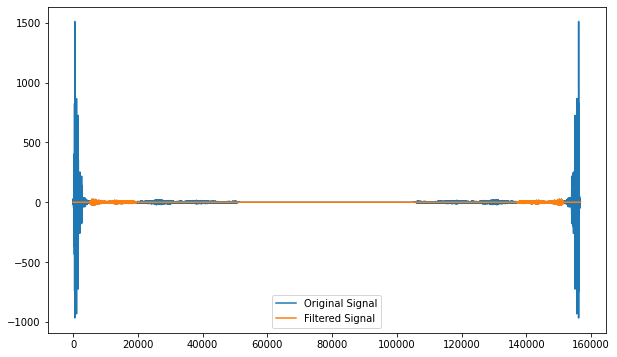

In [100]:
plt.figure(figsize=(10,6))
plt.plot(np.fft.fft(signal).real,label='Original Signal')
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal')
plt.legend()

High pass Filter

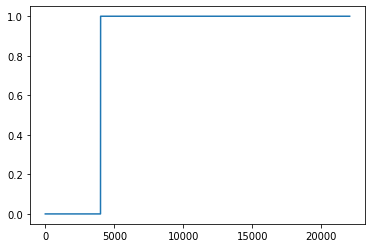

In [105]:
def rectangular_window(signal,cutoff_freq,fs):
    n = len(signal)
    freq = np.fft.rfftfreq(n,d=1/fs)  
    mask = np.abs(freq) >= cutoff_freq  
    plt.plot(freq,mask) 
    filtered_signal = np.fft.irfft(np.fft.rfft(signal) * mask, n)
    return filtered_signal

cutoff_freq = 4000
filtered_signal = rectangular_window(signal,cutoff_freq,samprate)

In [106]:
Audio(filtered_signal,rate=samprate)

In [127]:
sf.write('highpass.wav',filtered_signal,samprate)

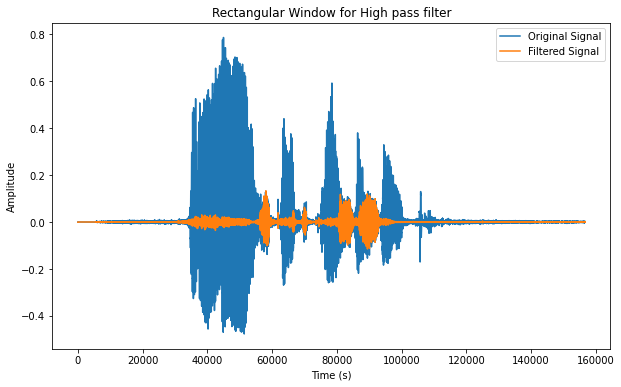

In [109]:
plt.figure(figsize=(10,6))
plt.plot(signal,label='Original Signal')
plt.plot(filtered_signal,label='Filtered Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Rectangular Window for High pass filter')
plt.legend()
plt.show()

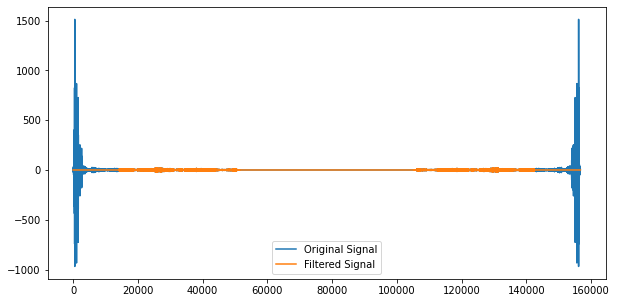

In [112]:
plt.figure(figsize=(10,5))
plt.plot(np.fft.fft(signal).real,label='Original Signal')
plt.plot(np.fft.fft(filtered_signal).real,label='Filtered Signal')
plt.legend()

A3. Repeat A2 with other filter types such as Cosine / Gausian filters.

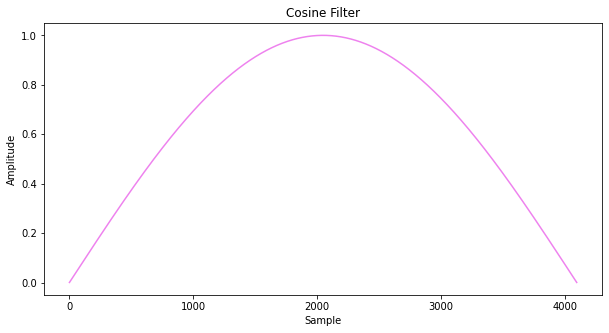

In [117]:
cutoff_freq = 1000
window_size = 4096  
cosine_filter = cosine(window_size, np.pi * cutoff_freq)

plt.figure(figsize=(10,5))
plt.plot(cosine_filter,color='violet')
plt.title('Cosine Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

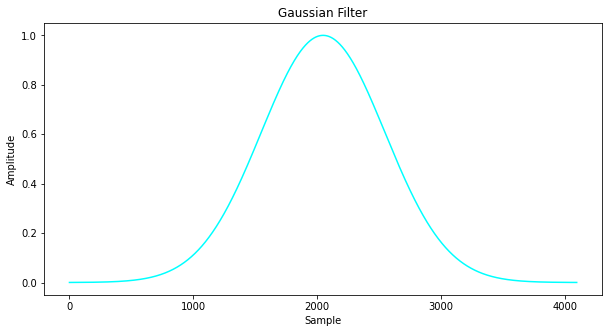

In [116]:
std_dev = 500
gaussian_filter = gaussian(window_size, std=std_dev)

plt.figure(figsize=(10,5))
plt.plot(gaussian_filter,color='cyan')
plt.title('Gaussian Filter')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

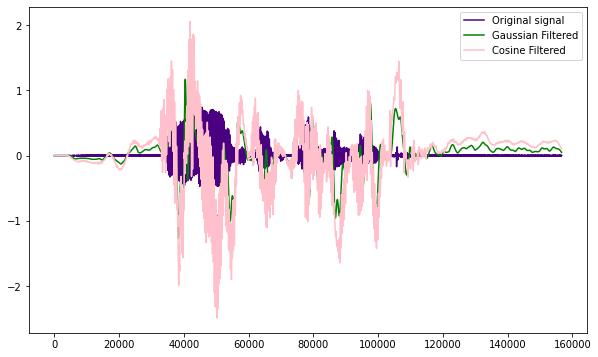

In [126]:
y_filtered_cosine = convolve(signal,cosine_filter,mode='same')
y_filtered_gaussian = convolve(signal,gaussian_filter,mode='same')
plt.figure(figsize=(10,6))
plt.plot(signal,label="Original signal",color='indigo')
plt.plot(y_filtered_gaussian,label='Gaussian Filtered',color='green')
plt.plot(y_filtered_cosine,label='Cosine Filtered',color='pink')
plt.legend()